In [ ]:
#import libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt


#import dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#clean dataset
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [64]:
#creates the pivot table for the top 3 most frequent roles and the counts of each skill. 
top3_jobs = df.groupby(by='job_title_short')['job_title_short'].count().sort_values(ascending = False).head(3).index.to_list()
df_exploded = df.explode('job_skills')
df_exploded = df_exploded[df_exploded['job_title_short'].isin(top3_jobs)]
df_exp = df_exploded.pivot_table(index = 'job_skills', columns= 'job_title_short', aggfunc = 'size')

df_exp


job_title_short,Data Analyst,Data Engineer,Data Scientist
job_skills,,,
airflow,2002.0,25505.0,3915.0
airtable,88.0,68.0,65.0
alteryx,4570.0,2294.0,2068.0
angular,376.0,1446.0,736.0
angular.js,2.0,45.0,12.0
...,...,...,...
wrike,39.0,6.0,8.0
wsl,16.0,16.0,31.0
xamarin,2.0,10.0,5.0


In [ ]:
#Gets individual Dataframe for each top role
df_exp_1 = df_exp[top3_jobs[0]].sort_values(ascending = False).head(10).reset_index(name = 'jobs_total')
df_exp_2 = df_exp[top3_jobs[1]].sort_values(ascending = False).head(10).reset_index(name = 'jobs_total')
df_exp_3 = df_exp[top3_jobs[2]].sort_values(ascending = False).head(10).reset_index(name = 'jobs_total')

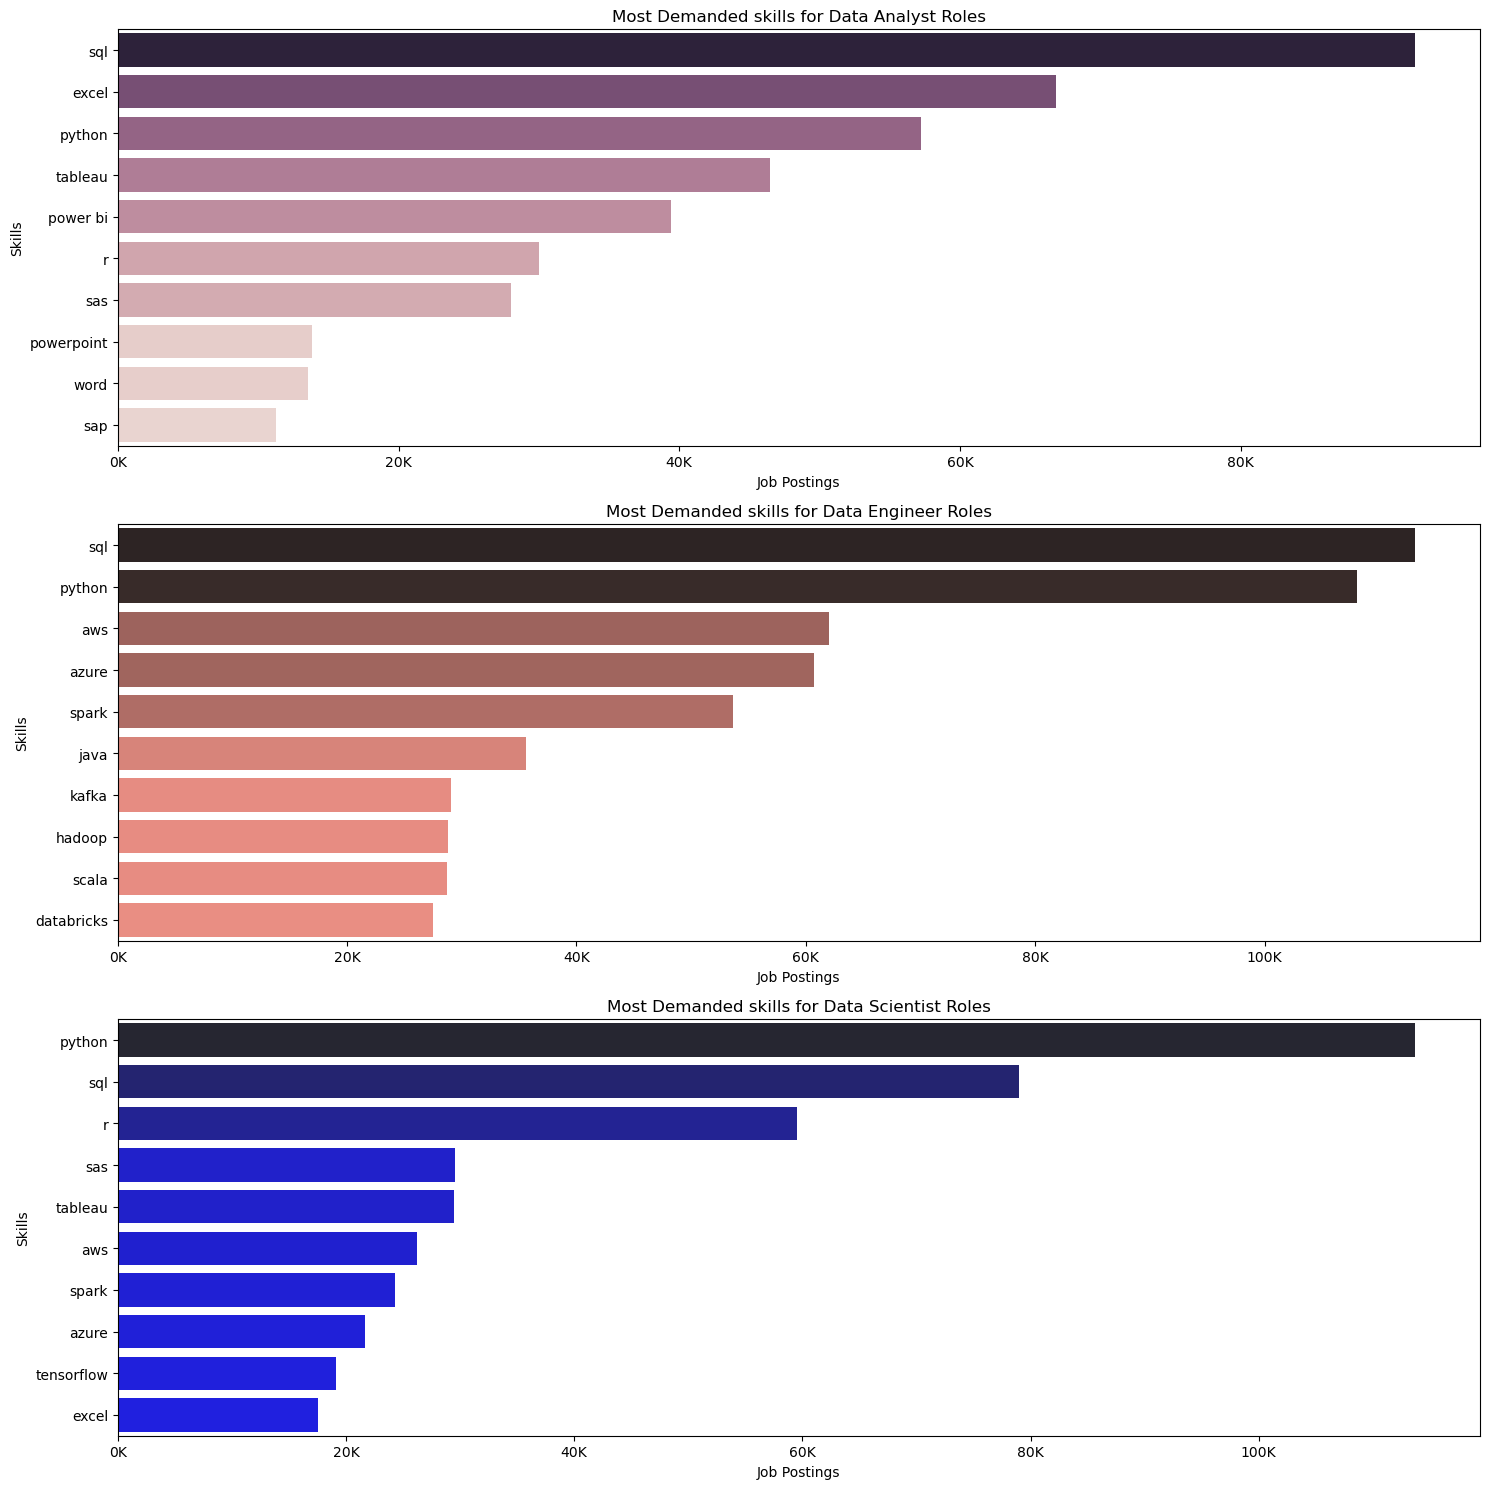

In [63]:
#plotting for each role using subplots
import seaborn as sns
fig, ax = plt.subplots(3,1, figsize = (15,15))

#plot 1 customization
sns.barplot(x = 'jobs_total', y = 'job_skills',data = df_exp_1, ax = ax[0], hue = 'jobs_total', legend= False)
ax[0].set_title('Most Demanded skills for ' + top3_jobs[0] + ' Roles')
ax[0].set_ylabel('Skills')
ax[0].set_xlabel('Job Postings')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K' ))


#plot 2 customization
sns.barplot(x = 'jobs_total', y = 'job_skills',data = df_exp_2, ax = ax[1], hue = 'jobs_total', palette='dark:salmon_r', legend= False)
ax[1].set_title('Most Demanded skills for ' + top3_jobs[1] + ' Roles')
ax[1].set_ylabel('Skills')
ax[1].set_xlabel('Job Postings')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K' ))


#plot 3 customization
sns.barplot(x = 'jobs_total', y = 'job_skills',data = df_exp_3, ax = ax[2], hue = 'jobs_total', palette = 'dark:b_r', legend= False)
ax[2].set_title('Most Demanded skills for ' + top3_jobs[2] + ' Roles')
ax[2].set_ylabel('Skills')
ax[2].set_xlabel('Job Postings')
ax[2].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K' ))





plt.tight_layout()